In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# from sklearn.tree._export import plot_tree

In [13]:
class Decision_Tree_Model():
    
    def __init__(self,file_link,delimiter):
        self.data = pd.read_csv(file_link,delimiter)
        self.x = self.data[self.data.columns[0:-1]]
        self.y = self.data[self.data.columns[-1]]
        self.encoding()
        self.feature_names = self.data.columns[:-1]
        self.target_names = self.data.columns[-1]
        
    def encoding(self):
        self.y = self.y.astype('category')
        self.y = self.y.cat.codes
        
    def print_data(self):
        print (self.x)
        print (self.y)
        
    def train_test(self):
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(self.x,self.y,test_size=0.33,random_state=20)
        
    def run_model(self):
        self.train_test()
        self.dec_tree = DecisionTreeClassifier(random_state=0)
        self.dec_tree.fit(self.x,self.y)
        
    def get_nodes(self):
        n_nodes = self.dec_tree.tree_.node_count
        children_left = self.dec_tree.tree_.children_left
        children_right = self.dec_tree.tree_.children_right
        feature = self.dec_tree.tree_.feature
        threshold = self.dec_tree.tree_.threshold


        decision_nodes = []


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
        node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
        is_leaves = np.zeros(shape=n_nodes, dtype=bool)
        stack = [(0, -1)]  # seed is the root node id and its parent depth
        while len(stack) > 0:
            node_id, parent_depth = stack.pop()
            node_depth[node_id] = parent_depth + 1

    # If we have a test node
            if (children_left[node_id] != children_right[node_id]):
                stack.append((children_left[node_id], parent_depth + 1))
                stack.append((children_right[node_id], parent_depth + 1))
            else:
                is_leaves[node_id] = True

        print("The binary tree structure has %s nodes and has the following tree structure:"% n_nodes)
        for i in range(n_nodes):
            if is_leaves[i]:
                print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
            else:
                #print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to node %s."% (node_depth[i] * "\t",i,children_left[i],feature[i],threshold[i],children_right[i],))
                decision_nodes.append([feature[i], threshold[i]])
                
        print(decision_nodes)
    
                
    def visualize(self):
        self.run_model()
        plt.figure(figsize=(10,10))
        self.visualize = plot_tree(self.dec_tree)
        self.get_nodes()

'''
def get_enc_dec(decision_nodes):
    lst_inp_enc_features = []
    b = []
    for i in range columns:
        lst_inp_enc_features.append(encryption(features[i]))
    for j in range len(decision_nodes):
        feature_number = decision_nodes[j][0]
        b[j] = SecComp(lst_inp_enc_features, decision_nodes[j][1])
    
    After getting the b[], calculate the polynomial version of DT.
    return poly_eval()
'''

'\ndef get_enc_dec(decision_nodes):\n    lst_inp_enc_features = []\n    b = []\n    for i in range columns:\n        lst_inp_enc_features.append(encryption(features[i]))\n    for j in range len(decision_nodes):\n        feature_number = decision_nodes[j][0]\n        b[j] = SecComp(lst_inp_enc_features, decision_nodes[j][1])\n    \n    After getting the b[], calculate the polynomial version of DT.\n    return poly_eval()\n'

The binary tree structure has 5 nodes and has the following tree structure:
	node=1 leaf node.
		node=3 leaf node.
		node=4 leaf node.
[[4, 0.800000011920929], [0, 100.5]]


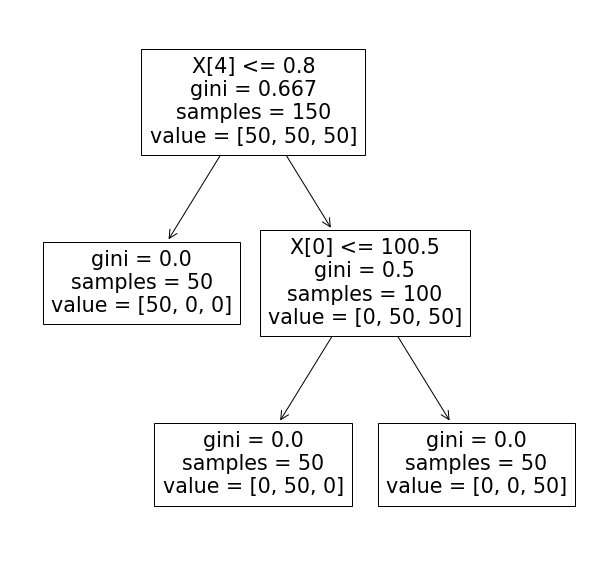

In [14]:
r = Decision_Tree_Model('Iris.csv',',')
r.visualize()